# Eigenvectors of the Graph Laplacian
 Computes a graph representation of the swiss roll dataset and computes
the eigenvectors of the graph laplacian. These eigenvectors become basis
functions, and the points are plotted according to their representation in
this basis.
    
The eigenvectors corresponding to the smallest eigenvalues of 
the graph Laplacian are the major basis functions on the graph. Each point can 
be represented as a sum of these eigenvector basis functions.The ith
component of the kth eigenvector represents how much the ith data point is 
represented by that basis function.

Notice the oscillatory pattern in the colors -- for the small eigenvalues, there are fewer
oscillations. With larger eigenvalues, the oscillations become more rapid, representing
higher-frequency variations in the graph. 

In [0]:
# Bash command to install umap
!pip install umap-learn

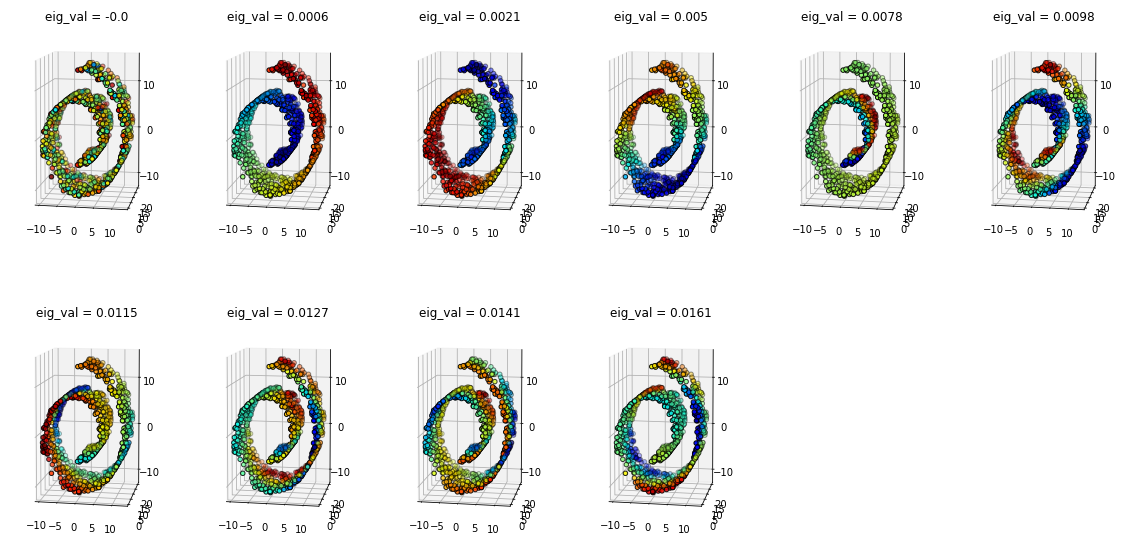

In [131]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import time
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh
from numpy.linalg import eig
from umap import UMAP

def plot_graph_components(n_samples=1000, n_eig_vecs=10, graph='knn', n_neighbors=10):
    """ Plots the data, coloring it according to its representation in terms of
    the eigenvectors of the graph Laplacian. The graph can be constructed by k-
    nearest neighbors or UMAP.
    
    Args:
        n_samples (int): number of samples from the swiss roll dataset
        n_eig_vecs (int): the number of eigenvectors to plot the components of. Must be less than n_samples - 1
        graph (str): the type of graph to use: 'umap' or 'knn'
        n_neighbors (int): the number of nearest neighbors to use for graph construction
    """
    data, _ = datasets.make_swiss_roll(n_samples=n_samples)

    if graph == 'knn':
        adj_matrix = sklearn.neighbors.kneighbors_graph(
            data, 
            n_neighbors, 
            mode='connectivity',
            metric='minkowski', 
            p=2, 
            metric_params=None, 
            include_self=False, 
            n_jobs=None
        )
    else:
        umap = UMAP(n_components=2, n_neighbors=n_neighbors)
        umap.fit_transform(data)
        adj_matrix = umap.graph_

    # Symmetrize the adjacency matrix
    adj_matrix = np.maximum( adj_matrix.todense(), adj_matrix.todense().T )

    laplace = laplacian(adj_matrix, normed=True)

    # eigsh gets eigenvectors and values from the graph laplacian
    eig_vals, eig_vecs = eigsh(laplace, k=n_eig_vecs, which='SM')
    labels = eig_vecs

    # Plot result
    fig = plt.figure(figsize=(20, 10))
    for i in range(n_eig_vecs):
        ax = fig.add_subplot(2, n_eig_vecs // 2 + 1, i+1, projection='3d')
        ax.view_init(7, -80)
        ax.scatter(data[:, 0], data[:, 1], data[:, 2],
                   c=eig_vecs[:, i],
                   s=20, 
                   cmap='jet',
                   edgecolor='k')
        plt.title(f"eig_val = {round(eig_vals[i], 4)}")


    plt.show()

plot_graph_components(n_samples=1000, n_eig_vecs=10, graph='umap', n_neighbors=10)